# 3. Linear Regression

In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.optim as optim

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## 3.1 Preparing Data

In [3]:
x_data = torch.Tensor([1, 2, 3, 4, 5])
y_data = torch.Tensor([2, 4, 6, 8, 10])

x = Variable(x_data.view(5, 1))
y = Variable(y_data.view(5, 1))

print(x, y)

Variable containing:
 1
 2
 3
 4
 5
[torch.FloatTensor of size 5x1]
 Variable containing:
  2
  4
  6
  8
 10
[torch.FloatTensor of size 5x1]



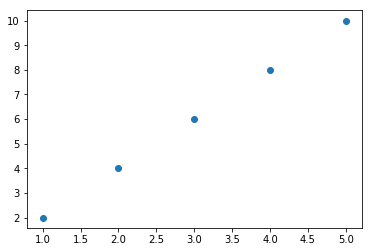

In [4]:
plt.scatter(x_data.numpy(), y.data.numpy())
plt.show()

## 3.2 Define Model with Grad, nn.loss

In [5]:
w = Variable(torch.rand(1,1))
w

Variable containing:
 0.3093
[torch.FloatTensor of size 1x1]

In [6]:
w*x

Variable containing:
 0.3093
 0.6185
 0.9278
 1.2370
 1.5463
[torch.FloatTensor of size 5x1]

In [7]:
loss = nn.MSELoss()

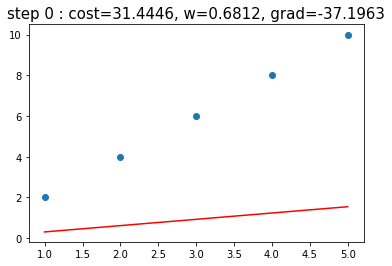

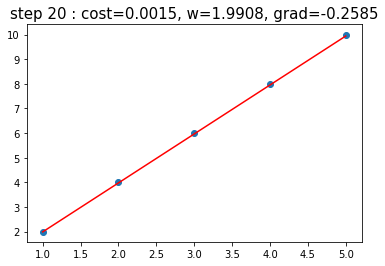

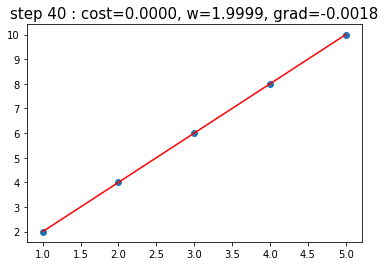

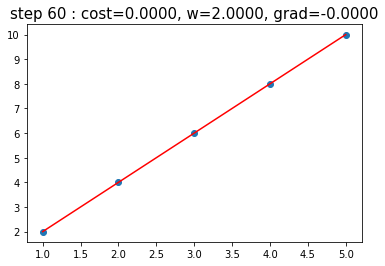

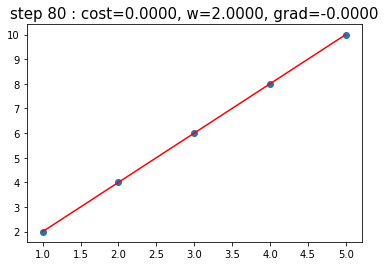

In [8]:
lr = 0.01

for step in range(100):
    pre = w*x
    cost = loss(pre, y)
    #(wx-y)^2 미분 시 2(wx-y)*x
    grad = 2*(pre-y).dot(x)/len(x)
    w -= lr*grad
    
    if step % 20 == 0 :
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), pre.data.numpy(), 'r-')
        # w.size() = 1*1, grad.size() = 1
        plt.title('step %d : cost=%.4f, w=%.4f, grad=%.4f' % (step, cost.data[0], w.data[0][0], grad.data[0]), fontdict={'size':15})
        plt.show()


In [9]:
x_new = Variable(torch.Tensor([6]))
y_new = w*x_new
y_new

Variable containing:
 12.0000
[torch.FloatTensor of size 1x1]

## 3.3 Define Model with nn.Linear, Optimizer

In [10]:
model = nn.Linear(1, 1, bias = False)
model.weight

Parameter containing:
-0.4344
[torch.FloatTensor of size 1x1]

In [11]:
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

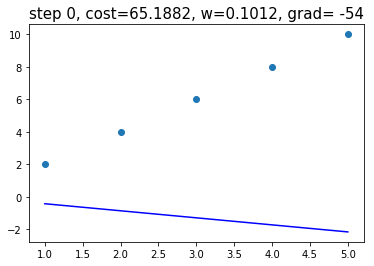

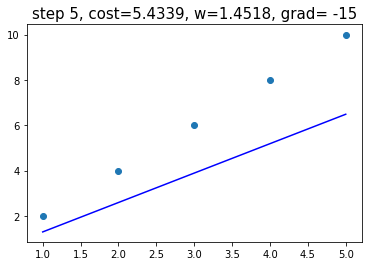

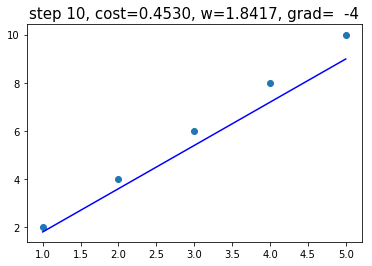

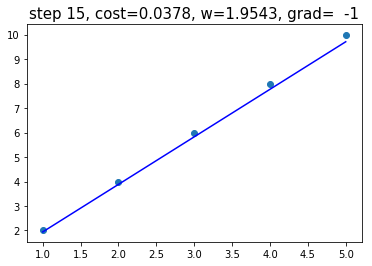

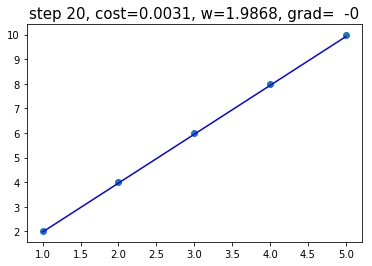

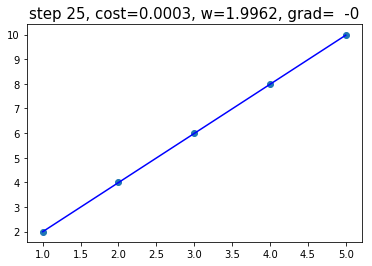

In [12]:
for step in range(30):
    pre = model(x)
    cost = loss(pre, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if step%5 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), pre.data.numpy(), 'b-')
        plt.title('step %d, cost=%.4f, w=%.4f, grad=%4.f' % (step, cost.data[0],model.weight.data[0][0], model.weight.grad), fontdict={'size':15})
        plt.show()

In [13]:
x_new = Variable(torch.Tensor([6]))
y_new = model(x_new)
y_new

Variable containing:
 11.9915
[torch.FloatTensor of size 1]

In [14]:
model.weight

Parameter containing:
 1.9986
[torch.FloatTensor of size 1x1]